In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd

In [6]:
sl = SegmentList([Joint(5000, 50_000, 50_000), Joint(5000, 50_000, 50_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([1000, 1000])

for e in sl.sub_segments:
    print(e)
    
plot_segment_list(sl.dataframe)

NameError: name 'N_BIG' is not defined

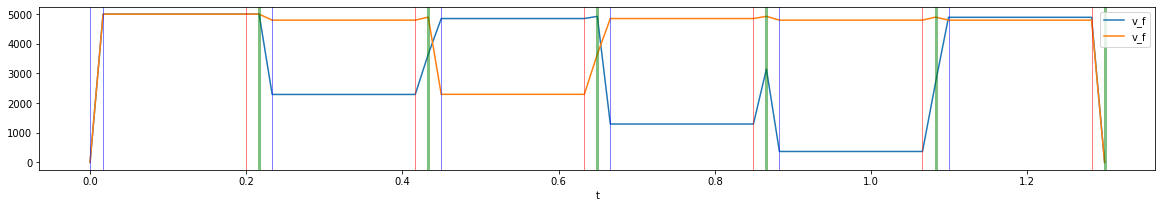

In [4]:
# Much faster accelerations than the last chart. 
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([1000, 500])
sl.add_distance_segment([300, 1000])
sl.add_distance_segment([100, 1000])
sl.add_distance_segment([1000, 1000])

#sl.update()
plot_segment_list(sl.dataframe)

|0.0167 0.1832 0.0167|[4899    -81  :   -879@4797   :  -40    4899] [4899    -81  :   -879@4797   :  -40    4899]
|0.0167 0.1832 0.0167|[4899    81   :    879@4797   :  40        0] [4899    81   :    879@4797   :  40        0]


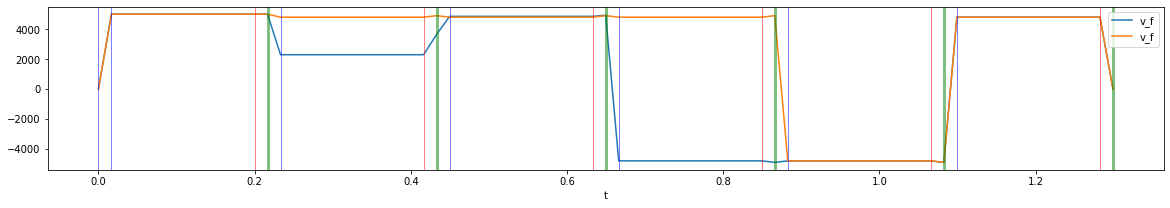

In [5]:
sl = SegmentList([Joint(5000, 300_000, 300_000),Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([500,1000])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([-1000,1000])
sl.add_distance_segment([-1000,-1000])
sl.add_distance_segment([1000,1000])

plot_segment_list(sl.dataframe)
print(str(sl))

In [ ]:
sl.dataframe.head()

array([0.0166667])

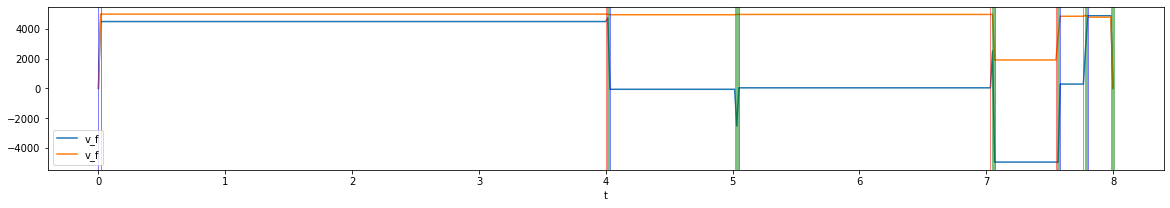

In [7]:
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([18000, 20000])
sl.add_distance_segment([-100, 5000])
sl.add_distance_segment([100, 10000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) ## ERROR! This velocity should not be negative
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative

df = sl.dataframe

plot_segment_list(sl.dataframe)
df[df.ss != 'c'].del_t.unique()

[1000, 1000]


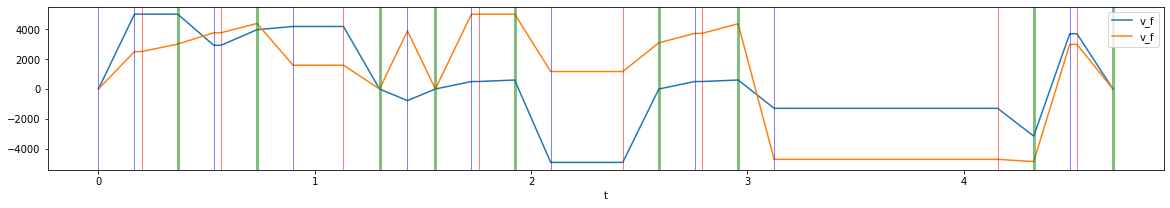

In [8]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 500])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([2000, 1000])
sl.add_distance_segment([-100, 500])
sl.add_distance_segment([100, 1000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) 
sl.add_position_segment([0, 0]) 
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative


plot_segment_list(sl.dataframe)

sl.validate()
print(sl.positions)

|0.1667 0.0332 0.1667|[5000    660  :     97@2919   :  243       0] [0        0   :      0@0      :   0        0]
|0.1667 0.0332 0.1667|[0        0   :      0@0      :   0        0] [0       417  :    167@5000   :  417       0]
[2000, 2000]


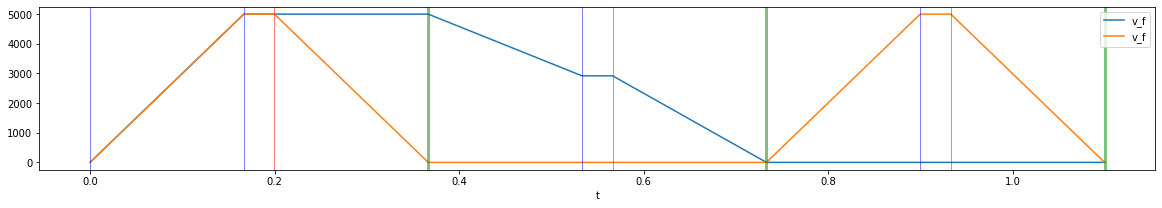

In [9]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([1000, 0])
sl.add_distance_segment([0, 1000])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)
    
#sl.validate()
print(sl.positions)

In [ ]:
14.908532541958522+85.55207900072237

In [10]:
sl = SegmentList([Joint(10000, 3000_000, 3000_000), Joint(10000, 3000_000, 3000_000)])

sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([-5.0,-100.0])
print(sl)
#sl.update(validate = False)



|0.0033 0.0066 0.0033|[0        1   :      3@527    :   1        0] [10000   -31  :    -55@8384   :  -14    9192]
|0.0033 0.0066 0.0033|[0       -1   :     -3@527    :  -1        0] [9192    -30  :    -56@8538   :  -14       0]


In [ ]:
10000 / 2500

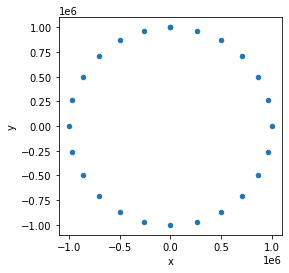

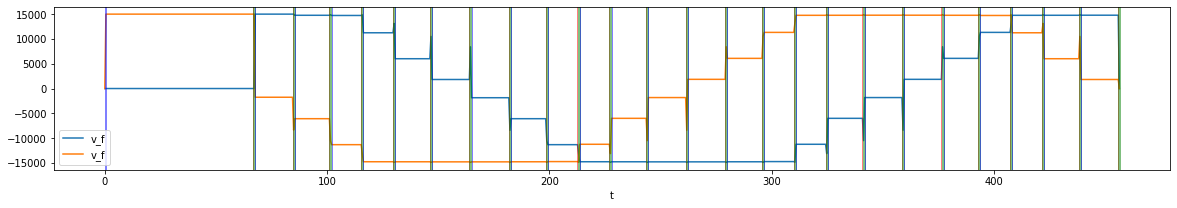

In [11]:
import numpy as np

sl = SegmentList([Joint(15000, 30_000, 30_000), Joint(15000, 30_000, 30_000)])

p = []
lx, ly = None,None
for a in np.linspace(0,2*np.pi, 25):
    x = np.sin(a)*1000000
    y = np.cos(a)*1000000
    
    
    if lx is None:
        lx, ly = x,y
        
    
    #print(f"sl.add_distance_segment([{x-lx},{y-ly}], validate=False)")
    p.append((x,y))
    sl.add_position_segment([x,y])
    lx, ly = x,y
    
df = pd.DataFrame(p, columns=['x','y'])
df.plot.scatter(x='x', y='y', figsize=(4,4))


#print(sl)
plot_segment_list(sl.dataframe)

In [ ]:
print(sl)

In [12]:
def sim_df(axis, sl):
    simsegs = []
    slsegs = []
    
    for e in sl.sub_segments:
        s = e[axis]

        t, x, v0, v1 = s.t, s.x, s.v_i, s.v_f
        a = float(v1-v0)/float(t)
        if abs(round(x)) !=0:
            slsegs.append([t, x, v0, v1, a])

            simsegs += list(tj.SimSegment(v0,v1,x=x,t=t))
        
    sl_df = pd.DataFrame(slsegs, columns="t x v0 v1 a".split())
        
    df = pd.DataFrame(simsegs,columns=tj.SimSegment.row_header)
    df['tc'] = df.cn.cumsum()
    df['xn'] = df.dir.cumsum()
    df['delay'] = 1 / df.cn
        
    return sl_df, df

def plot2d(df_0, df_1):
    s = pd.DataFrame({'tc':np.linspace(df_0.tc.min(),df_0.tc.max(), 50000)})
    dfx = pd.concat([df_0[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'x'})
    dfy = pd.concat([df_1[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'y'})

    df = dfx.join(dfy)
    
    df.plot.scatter(x='x', y='y', marker='.', figsize = (8, 8))


sl_df_0, df_0 = sim_df(0,sl)

sl_df_1, df_1 = sim_df(1,sl)

ax = df_0.plot(x='tc', y='xn', figsize = (20, 8) )
ax = df_1.plot(ax=ax,x='tc', y='xn')

plot2d(df_0, df_1)

AttributeError: 'SimSegment' object has no attribute 'x'

<AxesSubplot:xlabel='x', ylabel='y'>

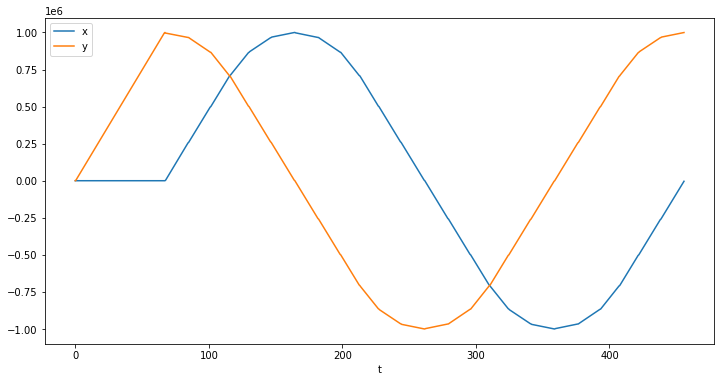

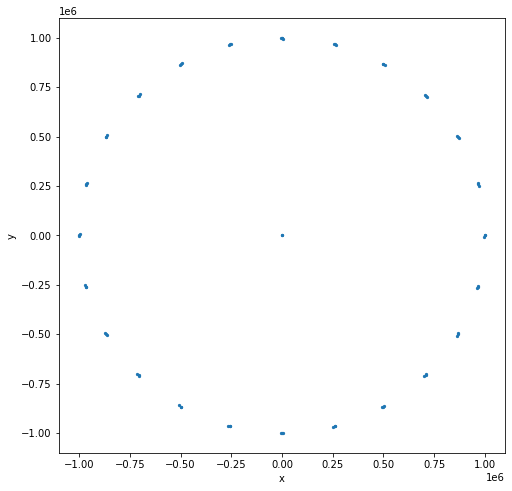

In [13]:
# Get the points from the subsegments. 
def generate_points(sl):
    t = 0
    x = 0
    y = 0

    for e in sl.sub_segments:
        yield(t, x, y)
        t += e[0].t
        x += e[0].x
        y += e[1].x
l = list(generate_points(sl))
df = pd.DataFrame(l, columns = 't x y'.split()).set_index('t')
df.plot(figsize=(12,6))
df.plot.scatter(x='x', y='y', marker='.',figsize = (8, 8))